In [22]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
House = pd.read_csv('Housing.csv')

In [3]:
House.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [5]:
House.shape

(545, 13)

DATA CLEANING

In [6]:
missing_values = House.isnull().sum()

In [7]:
missing_values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

SINCE WE DONT HAVE ANY MISSING VALUE, WE CAN PROCEED TO THE PREPROCESSING

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


WE NEED TO HANDLE CATEGORICAL VARIABLES BEFORE TRAINING THE MODEL, BECAUSE IT DOESNT RECOGNIZE CATEGORICAL FORMAT, WE NEED TO CONVERT THESE VARIABLES INTO NUMERICAL VALUES, THIS IS WHERE ONE HOT ENCODER COMES IT

In [10]:
categorical_cols = House.select_dtypes(include=['object']).columns

In [11]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(House[categorical_cols]))

In [12]:
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)
encoded_features.index = House.index


In [13]:
House_final = House.drop(categorical_cols, axis=1)
House_final = pd.concat([House_final, encoded_features], axis=1)

In [14]:
X = House_final.drop('price', axis=1)
y = House_final['price']

NOW WE NEED TO SPLIT THE DATASET AND TRAIN IT

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test_scaled)

NOW WE NEED TO APPLY AN EVALUATION TO THE MODEL

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [20]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Absolute Error (MAE): 970043.4039201643
Mean Squared Error (MSE): 1754318687330.668
Root Mean Squared Error (RMSE): 1324506.9600914402
R-squared (R2): 0.6529242642153176


WE CAN NOW VISUALIZE THE MODEL

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

TypeError: 'module' object is not callable

In [26]:
!pip install matplotlib

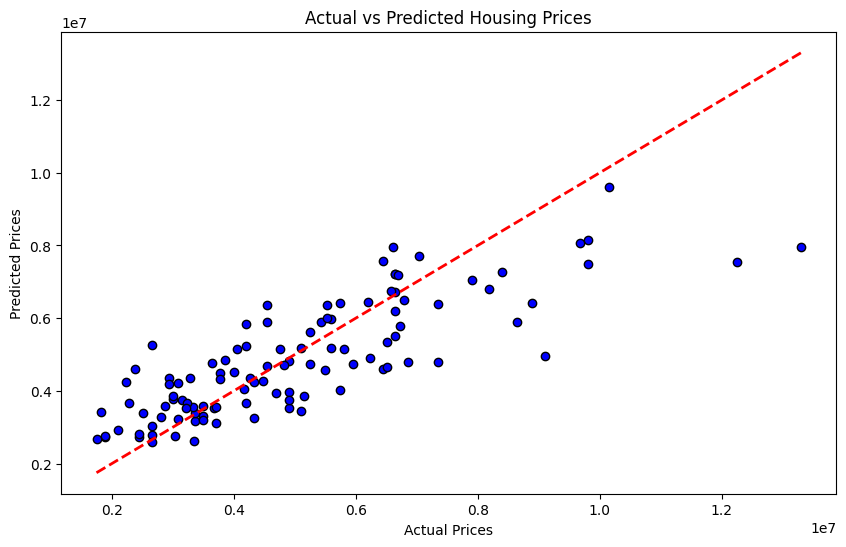

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices')
plt.show()


The Actual vs Predicted Housing Prices scatter plot shows how well the model's predictions match the real housing prices. Each dot represents a house, with its actual price on one axis and the predicted price on the other. The red dashed line in the middle represents perfect predictions, where the predicted price equals the actual price. If the dots are close to this line, it means the model made accurate predictions. If the dots are far from the line, the model's predictions were off. A random spread of dots around the line is a good sign, showing that the errors are balanced. However, if you notice a pattern, like the model always underestimating expensive houses, it could mean the model is missing important information.

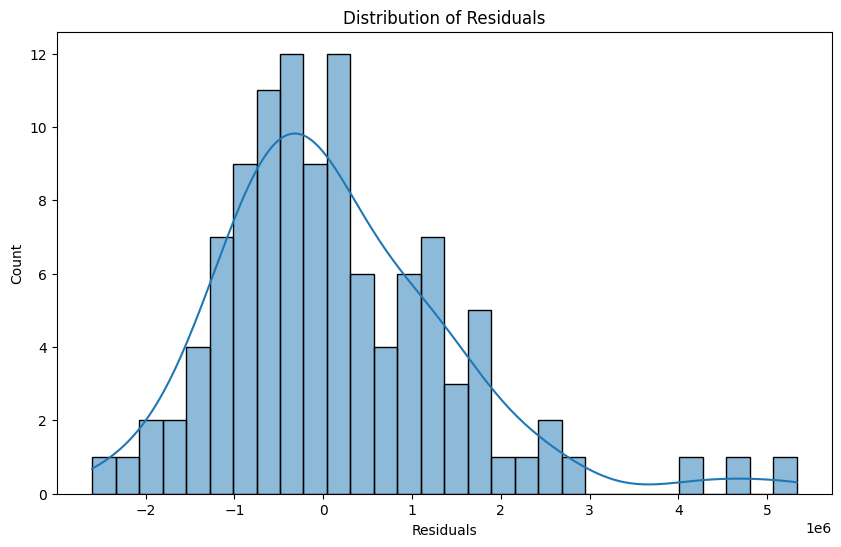

In [28]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


The Residuals Distribution plot helps us understand how the model's errors are spread out. Residuals are the differences between the actual and predicted prices. In a good model, these errors should be small and centered around zero, meaning the model isn't consistently over or under-predicting prices. The plot should look like a bell-shaped curve, showing that most predictions are close to the actual values, with only a few larger errors. If the plot is skewed to one side or has very large errors, it might suggest that the model is struggling with certain types of houses or that there are outliers in the data.